In [1]:
from typing import List,Tuple,Sequence,Union
from importlib import reload
from pathlib import Path
import dataloader as dl
import xarray as xr
import sys
sys.path.append('../')
import smartscan.TCP as TCP
from importlib import reload

import smartscan as sc

# create an instance of the controller, and connect it to our running server

here the running server is assumed to be in the localhost at port 12345

In [42]:
reload(sc)

<module 'smartscan' from 'd:\\Labview AJ\\pycomm\\smartscan\\notebooks\\..\\smartscan\\__init__.py'>

In [43]:
ctrl = sc.Controller('localhost', 54333)

In [44]:
ctrl.get_scan_info()

Connecting to localhost:54333
Sending message: NDIM
Waiting for response
Received: NDIM 2

Connecting to localhost:54333
Sending message: LIMITS
Waiting for response
Received: LIMITS 0.000000,100.000000 -100.000000,0.000000 

Connecting to localhost:54333
Sending message: FILENAME
Waiting for response
Received: FILENAME D:\Data\2023\Testing\Controller_9.h5

Connecting to localhost:54333
Sending message: CURRENT_POS
Waiting for response
Received: CURRENT_POS LoopA:93.0 LoopB:-50.0 



ValueError: could not convert string to float: 'LoopA:93.0'

In [45]:
print(f'current position: {ctrl.current_pos}')
print(f'limits: {ctrl.limits}')
print(f'filename: {ctrl.filename}')
print(f'ndim: {ctrl.ndim}')

current position: None
limits: [('0.000000', '100.000000'), ('-100.000000', '0.000000'), ('',)]
filename: D:\Data\2023\Testing\Controller_9.h5
ndim: 2


In [53]:
import time

In [60]:
ctrl.send_command("END")

Connecting to localhost:54333
Sending message: END
Waiting for response
Received: END 1


'END 1'

In [59]:
ctrl.ADD_POINT(42,87)
time.sleep(3)
ctrl.CURRENT_POS()

Connecting to localhost:54333
Sending message: ADD_POINT 42 87
Waiting for response
Received: ADD_POINT 42.000000 -999999999.000000 QueueLen 2

Connecting to localhost:54333
Sending message: CURRENT_POS
Waiting for response
Received: CURRENT_POS LoopA:42.0 LoopB:-87.0 



ValueError: could not convert string to float: 'LoopA:42.0'

In [58]:
float(-999999999.000000) == -999999999.

True

In [52]:
ctrl.CURRENT_POS()

Connecting to localhost:54333
Sending message: CURRENT_POS
Waiting for response
Received: CURRENT_POS LoopA:20.0 LoopB:-51.0 



ValueError: could not convert string to float: 'LoopA:20.0'

In [17]:
def add_points(*args):
    s = ""
    for arg in args:
        s += f"ADD_POINT {arg[0]} {arg[1]}\n"
    return s


In [26]:
add_points((20,-20),(30,-30),(40,-40))

'ADD_POINT 20 -20\nADD_POINT 30 -30\nADD_POINT 40 -40\n'

In [27]:
ctrl.send_command(add_points((20,-20),(30,-30),(40,-40)))

Connecting to localhost:54333
Sending message: ADD_POINT 20 -20
ADD_POINT 30 -30
ADD_POINT 40 -40

Waiting for response
Received: ADD_POINT 20.000000 -20.000000 QueueLen 2



'ADD_POINT 20.000000 -20.000000 QueueLen 2'

# spam new positions

In [28]:
for n in range(20,30):
    ctrl.ADD_POINT(n,-n)

Connecting to localhost:54333
Sending message: ADD_POINT 20 -20
Waiting for response
Received: ADD_POINT 20.000000 -20.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 21 -21
Waiting for response
Received: ADD_POINT 21.000000 -21.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 22 -22
Waiting for response
Received: ADD_POINT 22.000000 -22.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 23 -23
Waiting for response
Received: ADD_POINT 23.000000 -23.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 24 -24
Waiting for response
Received: ADD_POINT 24.000000 -24.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 25 -25
Waiting for response
Received: ADD_POINT 25.000000 -25.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 26 -26
Waiting for response
Received: ADD_POINT 26.000000 -26.000000 QueueLen 2

Connecting to localhost:54333
Send

In [30]:
ctrl.limits

[('0.000000', '100.000000'), ('-100.000000', '0.000000'), ('',)]

In [29]:
import numpy as np

In [34]:
int(float(ctrl.limits[0][0]))

0

In [37]:
xinit = np.random.randint(int(float(ctrl.limits[0][0])),int(float(ctrl.limits[0][1])),100)
yinit = np.random.randint(int(float(ctrl.limits[1][0])),int(float(ctrl.limits[1][1])),100)
for x,y in zip(xinit,yinit):
    ctrl.ADD_POINT(x,y)


Connecting to localhost:54333
Sending message: ADD_POINT 26 -67
Waiting for response
Received: ADD_POINT 26.000000 -67.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 57 -55
Waiting for response
Received: ADD_POINT 57.000000 -55.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 33 -28
Waiting for response
Received: ADD_POINT 33.000000 -28.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 25 -48
Waiting for response
Received: ADD_POINT 25.000000 -48.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 24 -1
Waiting for response
Received: ADD_POINT 24.000000 -1.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 40 -63
Waiting for response
Received: ADD_POINT 40.000000 -63.000000 QueueLen 2

Connecting to localhost:54333
Sending message: ADD_POINT 38 -99
Waiting for response
Received: ADD_POINT 38.000000 -99.000000 QueueLen 2

Connecting to localhost:54333
Sendin

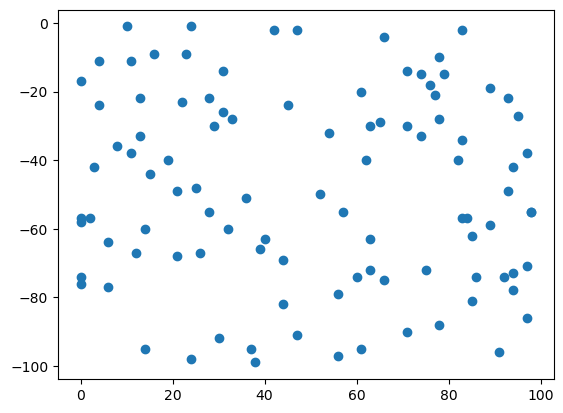

In [38]:
import matplotlib.pyplot as plt
plt.scatter(xinit,yinit)

In [41]:
float("a")

ValueError: could not convert string to float: 'a'

In [40]:
ctrl.ADD_POINT(101,-50)

Connecting to localhost:54333
Sending message: ADD_POINT 101 -50
Waiting for response
Received: ADD_POINT -999999999.000000 -50.000000 QueueLen 2



In [16]:
out = "CURRENT_POS Loop:20 Loop:-20"
ax, val = out.split(" ")[1].split(":")

['Loop', '20']

In [11]:
ctrl.send_command("pause")

Connecting to localhost:54333
Sending message: PAUSE
Waiting for response
Received: PAUSE unpaused



'PAUSE unpaused\r\n'

In [12]:
ctrl.send_command("End")

Connecting to localhost:54333
Sending message: END
Waiting for response
Received: END 1


'END 1'

In [18]:
fname = ctrl.FILENAME()

Connecting to localhost:54333
Sending message: FILENAME
Waiting for response
Received: FILENAME D:\Data\2023\Testing\Controller_2.h5



In [23]:
fname.strip("\r\n")

'D:\\Data\\2023\\Testing\\Controller_2.h5'

In [25]:
Path(fname.strip("\r\n")).exists()

True

In [26]:
ctrl.send_command("END")

Connecting to localhost:54333
Sending message: END
Waiting for response
Received: END 1


'END 1'